# Excersise 1: Api Data

The aim of this excersice is to get data from the API and do some investigations and create some visualisations. 

It is also possible to create some of these visulisations in Excel and the demonstrators can help with that if you want to try it. 


The main goal of this excersies is to be able to choose a couple of clinics and compare the number of cases of a choosen disease per week. We want to create a plot that looks something like this: 





This Excersies consists of the following steps
1. Create a requests session and authenticated using username and password
2. Access data from the API and create a simple chart using matplotlib
3. Using location and code data to get API data for a specific disease / location
4. Creating a plot comparing cases from different locations
5. Creating a plot comparing different disease from the same location

In [1]:
import requests
from matplotlib import pylab
%matplotlib notebook

In [2]:
# Request session and authentication 

session = requests.Session()
session.post("https://demo.emro.info/en/login_request",
                            json={"password": "secret",
                                "username": "admin" 
                            })


<Response [200]>

To get weekly data from the API we can use the 
`/api/aggregate_year/<variable>/<location_id>` api endpoint. Let's start with getting the number of females. Females have the variable id **gen_1**.

Then try to plot the values versus the weeks using pylab.plot().


In [3]:
data = session.get("https://demo.emro.info/api/aggregate_year/gen_1/1").json()

<IPython.core.display.Javascript object>


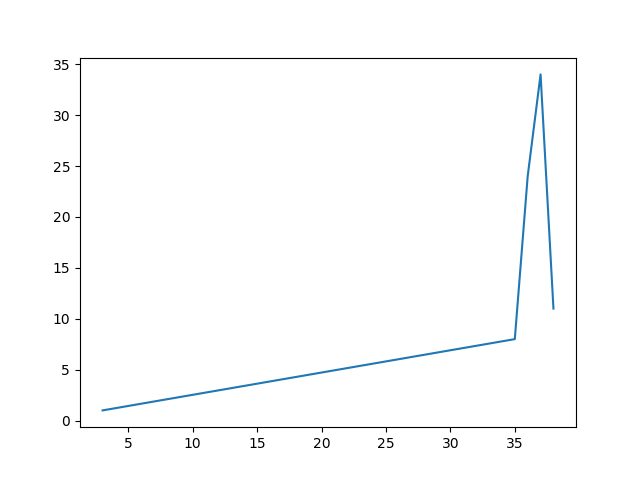

In [4]:
weeks = sorted(data["weeks"].keys())
values = [data["weeks"][w] for w in weeks]
pylab.figure()
pylab.plot(weeks, values)

We have used location_id = 1 to get data from the whole country. Here is a list of ids and location name to help you find the location id based on the name of the location you want to investigate

In [5]:
location_data = session.get("https://demo.emro.info/api/locations").json()
for l in location_data.keys():
    print("id:", l, "name:", location_data[l]["name"])

id: 1 name: Demo
id: 2 name: Zone 1
id: 3 name: Zone 2
id: 4 name: Region 1
id: 5 name: Region 2
id: 6 name: District 1
id: 7 name: District 2
id: 8 name: District 3
id: 9 name: Clinic 1
id: 10 name: Clinic 2
id: 11 name: Clinic 3
id: 12 name: Clinic 4
id: 13 name: Clinic 5


Here follows also a selection of codes you can use for this excersice

In [27]:
variables = {}
for category in ["gender", "age", "cd_tab", "ncd_tab"]:
    data = session.get("https://demo.emro.info/api/variables/" + category).json()
    for l in data.keys():
        print("Variable id:", l, "name:", data[l]["name"])
    variables.update(data)

Variable id: gen_1 name: Male
Variable id: gen_2 name: Female
Variable id: age_1 name: <5
Variable id: age_2 name: 5-9
Variable id: age_3 name: 10-14
Variable id: age_4 name: 15-19
Variable id: age_5 name: 20-59
Variable id: age_6 name: >60
Variable id: cmd_1 name: Cholera
Variable id: cmd_10 name: Tetanus
Variable id: cmd_11 name: Diphtheria
Variable id: cmd_12 name: Whooping cough
Variable id: cmd_13 name: Scarlet fever
Variable id: cmd_14 name: Meningitis
Variable id: cmd_15 name: Syphilis
Variable id: cmd_16 name: Gonorrhoea
Variable id: cmd_17 name: Relapsing fevers
Variable id: cmd_18 name: Typhus fever
Variable id: cmd_19 name: Polio
Variable id: cmd_2 name: Typhoid fever
Variable id: cmd_20 name: Rabies
Variable id: cmd_21 name: Viral meningitis
Variable id: cmd_22 name: Dengue Fever
Variable id: cmd_23 name: Yellow fever
Variable id: cmd_24 name: Viral haemorrhagic fever
Variable id: cmd_25 name: Ebola virus disease
Variable id: cmd_26 name: Chicken pox
Variable id: cmd_27 nam

## Creating a plot of weekly case numbers comparing different locations

Let us now try to create a plot of cases with your chosen disease and for your chosen clinics. First get a plot of cases per week for one clinic. Then try to add a line from another clinic. A nice solution for this is to write a loop over a list of clinic ids and then add a line to the plot for each id. 

<IPython.core.display.Javascript object>


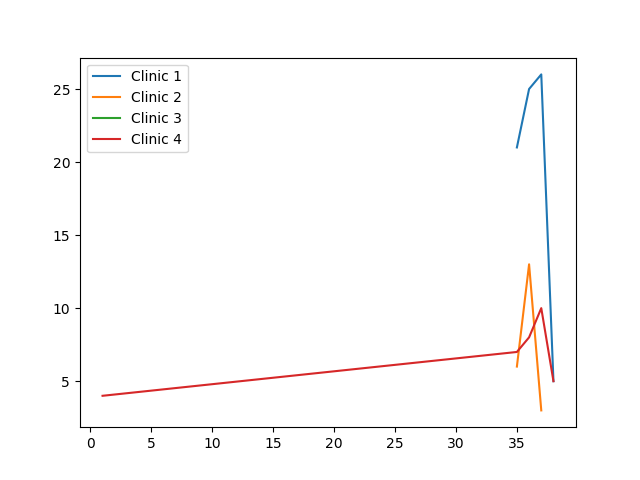

In [28]:
# For this part of the solution I will use variable_id tot_1 and location_ids 3, 4, 5, 6

variable_id = "tot_1"
locations = [9, 10, 11, 12]
pylab.figure()
for location in locations:
   
    data = session.get("https://demo.emro.info/api/aggregate_year/{}/{}".format(variable_id,
                                                                               location)).json()
    weeks = sorted(data["weeks"].keys())
    values = [data["weeks"][w] for w in weeks]

    pylab.plot(weeks, values, label = location_data[str(location)]["name"])
pylab.legend()
pylab.show()

## Creating a plot to compare disease from the same clinic

<IPython.core.display.Javascript object>


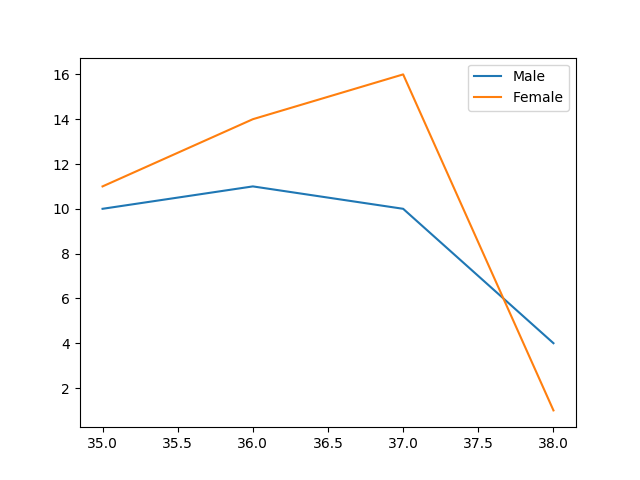

In [29]:
variable_ids = ["gen_1", "gen_2"]
location = 9
pylab.figure()
for variable_id in variable_ids:
   
    data = session.get("https://demo.emro.info/api/aggregate_year/{}/{}".format(variable_id,
                                                                               location)).json()
    weeks = sorted(data["weeks"].keys())
    values = [data["weeks"][w] for w in weeks]

    pylab.plot(weeks, values, label = variables[variable_id]["name"])
pylab.legend()
pylab.show()

# Extra excersises

A lot of improvements can be done to format these plots to make them look better. It is also possible to change them into bar charts etc. 